Prediction of the presence of breast cancer using various classfication algorithms. 

The performance of the various models will be critically evaluated and compared with recommedndations of the appropraite future deployment if any. Also, there will be a justification for the choosen performance metrics

In [2]:
#Importing all the necessary libraries with Numpy for working with arrays and scientific computing,
#pandas for data manipulation and analysis 

import numpy as np
import pandas as pd

# matplotlib and seaborn for visualization and plotting of data

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# sklearn modules for ML model selection and preprocessing
# Common sklearn Model Helpers

from sklearn import feature_selection
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#It removes features whose variance doesnt meet some threshold for example features that have the same values in all selections

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFECV


#Keras is used in the implementation of neural networks which deals with ordering or sequencing of layers
#within a model.It basically makes the layers associated with neural networks work 
#with Keras API or Keras library for seamless functionality.

import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers import Dense

# Libraries for other data modelling
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier


# sklearn modules for performance metrics

from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

LOADING AND VIEWING THE DATASET

In [3]:
# Loading and viewing the dataset
breast_cancer = pd.read_csv('breast_cancer.csv')
print(f'breast_cancer data shape: {breast_cancer.shape}')
breast_cancer.head()

breast_cancer data shape: (569, 32)


,ID_number,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave,Worst_Symmetry,Worst_Fractal_Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [5]:
#Using the info function to reveal information about the datatypes of each column
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_number                569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Mean_Radius              569 non-null    float64
 3   Mean_Texture             569 non-null    float64
 4   Mean_Perimeter           569 non-null    float64
 5   Mean_Area                569 non-null    float64
 6   Mean_Smoothness          569 non-null    float64
 7   Mean_Compactness         569 non-null    float64
 8   Mean_Concavity           569 non-null    float64
 9   Mean_Concave             569 non-null    float64
 10  Mean_Symmetry            569 non-null    float64
 11  Mean_Fractal_Dimension   569 non-null    float64
 12  Radius_SE                569 non-null    float64
 13  Texture_SE               569 non-null    float64
 14  Perimeter_SE             5

DATA PREPROCESSING AND CLEANING

In [4]:
#Checking and counting duplicates
breast_cancer.duplicated().sum()

0

In [6]:
#Dropping the id column

breast_cancer.drop('ID_number',axis=1,inplace=True)

In [7]:
#Checking the percentage of missing data
total = breast_cancer.isnull().sum().sort_values(ascending = False)
percent = (breast_cancer.isnull().sum() / breast_cancer.isnull().count()).sort_values(ascending = False)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(10)

,Total,Percent
Diagnosis,0,0.0
Compactness_SE,0,0.0
Worst_Symmetry,0,0.0
Worst_Concave,0,0.0
Worst_Concavity,0,0.0
Worst_Compactness,0,0.0
Worst_Smoothness,0,0.0
Worst_Area,0,0.0
Worst_Perimeter,0,0.0
Worst_Texture,0,0.0


In [8]:
#Checking the statistical analysis of the dataset

breast_cancer.describe()

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave,Mean_Symmetry,Mean_Fractal_Dimension,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave,Worst_Symmetry,Worst_Fractal_Dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [9]:
#Checking the statistical analysis of the dataset including the object variables

breast_cancer.describe(include='all')

,Diagnosis,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave,Mean_Symmetry,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave,Worst_Symmetry,Worst_Fractal_Dimension
count,569,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,B,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,357,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,NaN,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,NaN,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,NaN,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,NaN,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,NaN,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080


In [10]:
##View the dataset that are object 
dtype_object=breast_cancer.select_dtypes(include=['object'])
dtype_object.head()

,Diagnosis
0,M
1,M
2,M
3,M
4,M


In [11]:
##View the dataset that are object and check for their unique values 
for x in dtype_object.columns:
    print("{} unique values:".format(x),breast_cancer[x].unique())
    print("*"*20)

Diagnosis unique values: ['M' 'B']
********************


EXPLORATORY DATA ANALYSIS

In [12]:
#Confirming the distribution of the class label
breast_cancer['Diagnosis'].value_counts()

B    357
M    212
Name: Diagnosis, dtype: int64

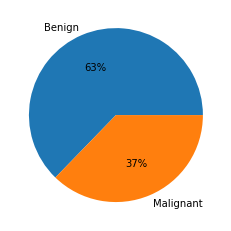

In [13]:
#plotting a pie chart for the class label
#define data
data = (breast_cancer['Diagnosis'].replace(to_replace=['B','M'], value=['Benign', 'Malignant']).value_counts())

labels = ['Benign', 'Malignant']

#create pie chart
plt.pie(data, labels = labels, autopct='%.0f%%')
plt.show()

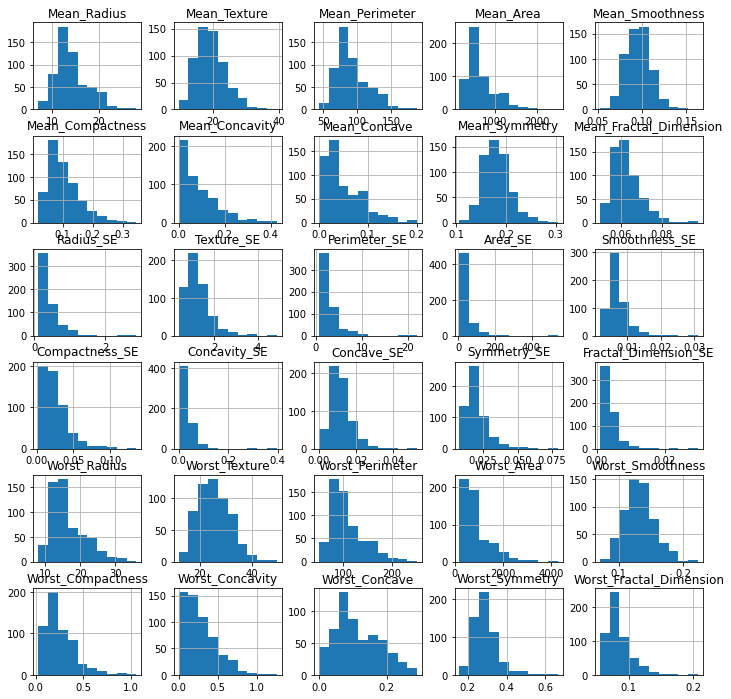

In [14]:
# plot histograms for each variable
breast_cancer.hist(figsize = (12, 12))
plt.show()

sns.histplot(breast_cancer.Clump_Thickness)
plt.title('Clump Thickness distribution')
plt.show()

plt.figure(figsize=(10, 5))
plt.title("Breast Cancer data based on the Clump Thickness")
sns.histplot(x="Clump_Thickness", hue="Class", data=breast_cancer)
plt.show()

CORRELATION ANALYSIS

In [16]:
breast_cancer.corr()

,Mean_Radius,Mean_Texture,Mean_Perimeter,Mean_Area,Mean_Smoothness,Mean_Compactness,Mean_Concavity,Mean_Concave,Mean_Symmetry,Mean_Fractal_Dimension,...,Worst_Radius,Worst_Texture,Worst_Perimeter,Worst_Area,Worst_Smoothness,Worst_Compactness,Worst_Concavity,Worst_Concave,Worst_Symmetry,Worst_Fractal_Dimension
Mean_Radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
Mean_Texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
Mean_Perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
Mean_Area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
Mean_Smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
Mean_Compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
Mean_Concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
Mean_Concave,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
Mean_Symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413
Mean_Fractal_Dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.253691,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297


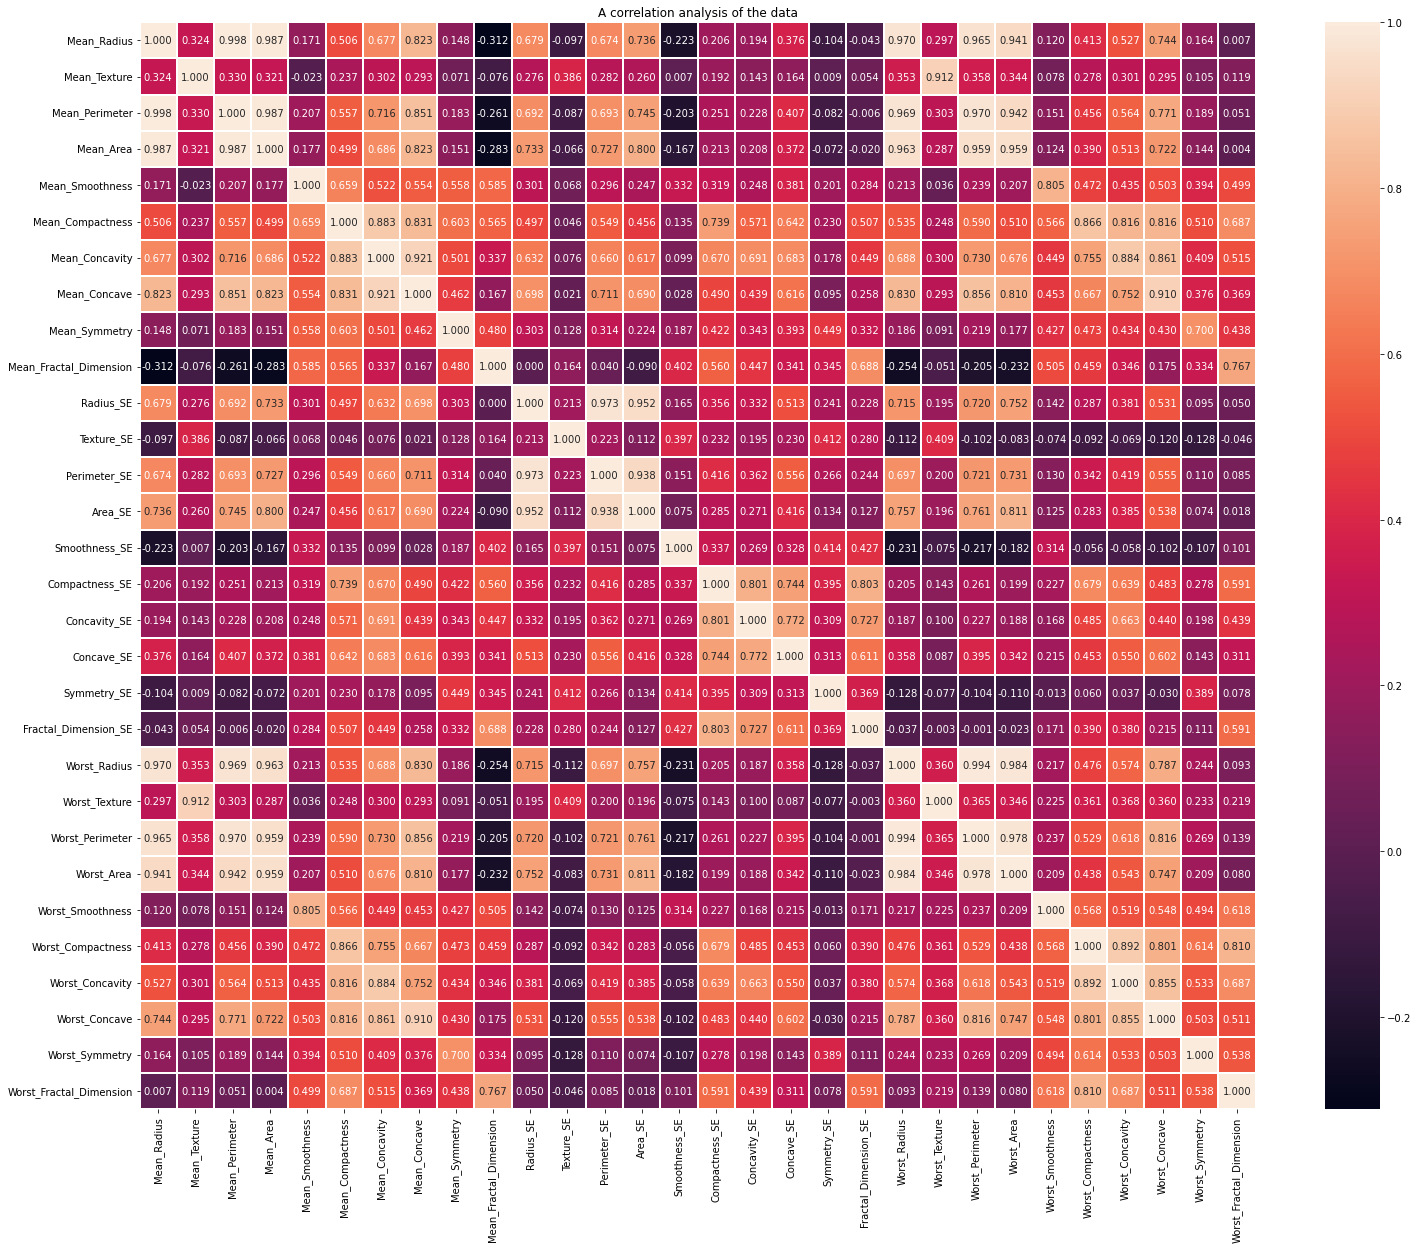

In [17]:
#A plot showing the correlational analysis of the dataset
plt.figure(figsize=(25,20))
sns.heatmap(breast_cancer.corr(),annot=True,fmt='.3f',linewidths=2)
plt.title('A correlation analysis of the data')
plt.show()

In [18]:
# Correlation of the Mean, standard deviation and the worst variables
Mean_var = breast_cancer.iloc[:,1:11]
SE_var = breast_cancer.iloc[:, 12:21]
Worst_var = breast_cancer.iloc[:, 22:31]

Text(0.5, 1.0, 'correlation plot for the mean data')

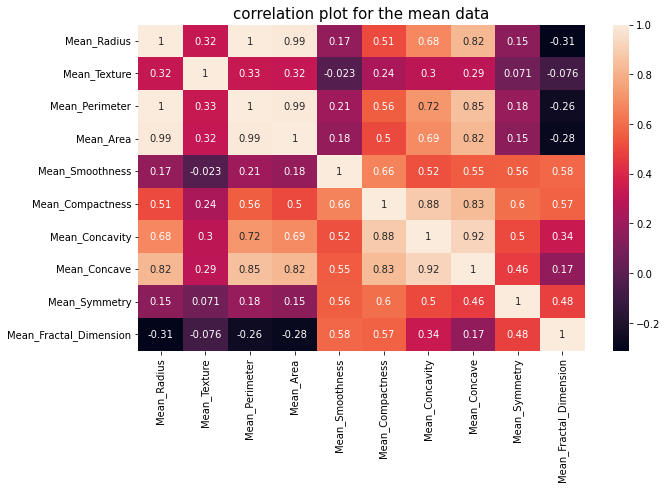

In [19]:
# correlation analysis using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(Mean_var.corr(),annot=True)
plt.title("correlation plot for the mean data",size=15)

<AxesSubplot:>

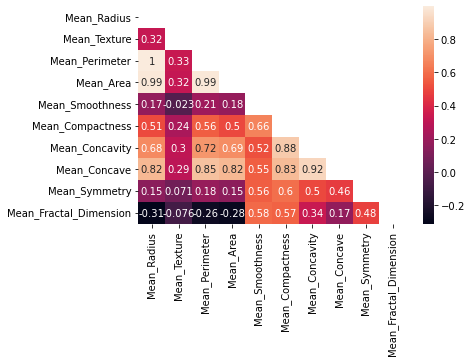

In [20]:
corr= Mean_var.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

Text(0.5, 1.0, 'correlation plot for the standard deviation data')

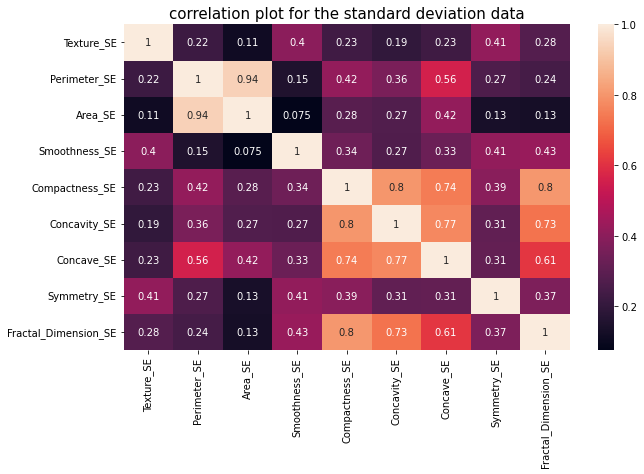

In [21]:
# correlation analysis of SE data using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(SE_var.corr(),annot=True)
plt.title("correlation plot for the standard deviation data",size=15)

<AxesSubplot:>

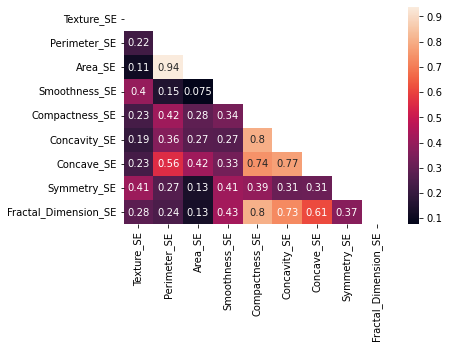

In [22]:
corr= SE_var.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

Text(0.5, 1.0, 'correlation plot for the worst data')

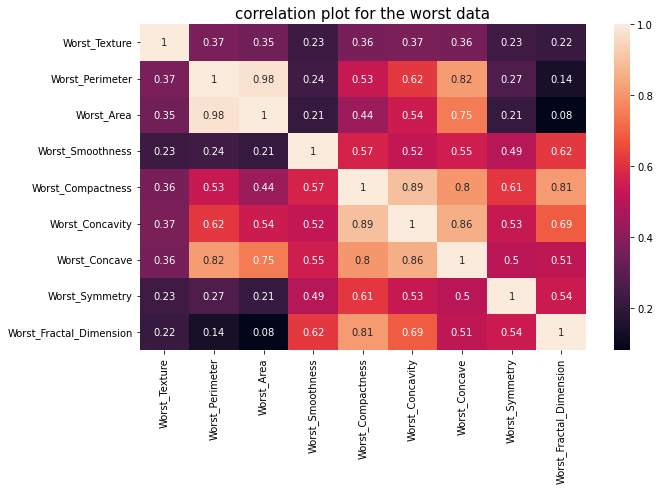

In [23]:
# correlation analysis of worst data using heatmap
plt.figure(figsize=(10,6))
sns.heatmap(Worst_var.corr(),annot=True)
plt.title("correlation plot for the worst data",size=15)

<AxesSubplot:>

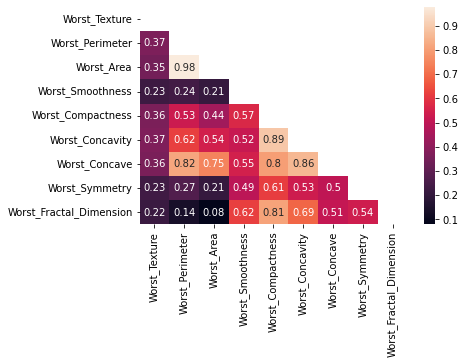

In [24]:
corr= Worst_var.corr()
matrix = np.triu(corr)
sns.heatmap(corr, annot=True, mask=matrix)

PREPARATION FOR MACHINE LEARNING

In [25]:
#Replacement of Diagnosis column to numerical values

breast_cancer['Diagnosis'].replace(to_replace=['M','B'], value=[1,0], inplace = True)

[Text(0, 0, '357'), Text(0, 0, '212')]

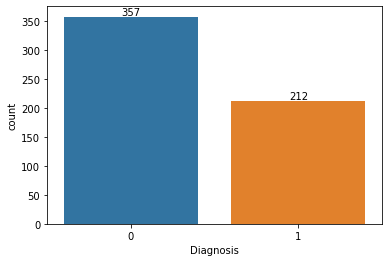

In [26]:
#Visualizing the distribution inpreparation for machine learning
ax = sns.countplot((breast_cancer['Diagnosis']))
ax.bar_label(ax.containers[0])

In [27]:
#Split the data set into dependent and independent variable 
data = breast_cancer.drop('Diagnosis',axis=1)
outcome = breast_cancer['Diagnosis']
X,y = data,outcome

In [28]:
#using the train_test_split from Scikit Learn, the data was divided into a train and a test dataset.
#(80% train & 20% test)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=0)

In [29]:
# Removing the less important features (irrelevant) fit_transform learn and fit to 
#the training dataset while transform doesnt fit 

selection = VarianceThreshold(threshold=0)
X_train_fs = selection.fit_transform(X_train)
X_test_fs = selection.transform(X_test)
print(f"{X_train.shape[1]-X_train_fs.shape[1]} features have been removed, {X_train_fs.shape[1]} features remain")

0 features have been removed, 30 features remain


In [30]:
#using the StandardScaler estimator from Scikit Learn scales the data so that 
#the mean of each variable is 0, and the standard deviation is 1

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_fs)
X_test = scaler.transform(X_test_fs)

In [31]:
X_train.shape

(455, 30)

NEURAL NETWORK CLASSIFIER

In [33]:
classifier = tf.keras.models.Sequential()

# Adding the input layer and the hidden layer
classifier.add(tf.keras.layers.Dense(25,activation='relu',input_shape=(30,)))

# Adding the output layer
classifier.add(tf.keras.layers.Dense(1,  activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

history = classifier.fit(X_train, y_train, batch_size = 8, epochs= 100, verbose=2, validation_split=0.2)

Epoch 1/100
46/46 - 1s - loss: 0.4012 - accuracy: 0.8764 - val_loss: 0.2526 - val_accuracy: 0.9560 - 1s/epoch - 22ms/step
Epoch 2/100
46/46 - 0s - loss: 0.2319 - accuracy: 0.9396 - val_loss: 0.1701 - val_accuracy: 0.9560 - 99ms/epoch - 2ms/step
Epoch 3/100
46/46 - 0s - loss: 0.1718 - accuracy: 0.9533 - val_loss: 0.1273 - val_accuracy: 0.9670 - 80ms/epoch - 2ms/step
Epoch 4/100
46/46 - 0s - loss: 0.1380 - accuracy: 0.9670 - val_loss: 0.1017 - val_accuracy: 0.9670 - 68ms/epoch - 1ms/step
Epoch 5/100
46/46 - 0s - loss: 0.1170 - accuracy: 0.9643 - val_loss: 0.0879 - val_accuracy: 0.9780 - 82ms/epoch - 2ms/step
Epoch 6/100
46/46 - 0s - loss: 0.1019 - accuracy: 0.9615 - val_loss: 0.0749 - val_accuracy: 1.0000 - 89ms/epoch - 2ms/step
Epoch 7/100
46/46 - 0s - loss: 0.0906 - accuracy: 0.9698 - val_loss: 0.0668 - val_accuracy: 1.0000 - 69ms/epoch - 1ms/step
Epoch 8/100
46/46 - 0s - loss: 0.0826 - accuracy: 0.9780 - val_loss: 0.0601 - val_accuracy: 1.0000 - 75ms/epoch - 2ms/step
Epoch 9/100
46/46

Epoch 67/100
46/46 - 0s - loss: 0.0099 - accuracy: 0.9973 - val_loss: 0.0481 - val_accuracy: 0.9780 - 90ms/epoch - 2ms/step
Epoch 68/100
46/46 - 0s - loss: 0.0093 - accuracy: 0.9973 - val_loss: 0.0492 - val_accuracy: 0.9780 - 125ms/epoch - 3ms/step
Epoch 69/100
46/46 - 0s - loss: 0.0091 - accuracy: 0.9973 - val_loss: 0.0488 - val_accuracy: 0.9780 - 98ms/epoch - 2ms/step
Epoch 70/100
46/46 - 0s - loss: 0.0088 - accuracy: 0.9973 - val_loss: 0.0493 - val_accuracy: 0.9780 - 90ms/epoch - 2ms/step
Epoch 71/100
46/46 - 0s - loss: 0.0085 - accuracy: 1.0000 - val_loss: 0.0506 - val_accuracy: 0.9780 - 103ms/epoch - 2ms/step
Epoch 72/100
46/46 - 0s - loss: 0.0085 - accuracy: 0.9973 - val_loss: 0.0503 - val_accuracy: 0.9780 - 158ms/epoch - 3ms/step
Epoch 73/100
46/46 - 0s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0536 - val_accuracy: 0.9780 - 140ms/epoch - 3ms/step
Epoch 74/100
46/46 - 0s - loss: 0.0079 - accuracy: 1.0000 - val_loss: 0.0531 - val_accuracy: 0.9780 - 125ms/epoch - 3ms/step
Epo

In [34]:
#viewing the model summary

classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                775       
                                                                 
 dense_1 (Dense)             (None, 1)                 26        
                                                                 
Total params: 801
Trainable params: 801
Non-trainable params: 0
_________________________________________________________________


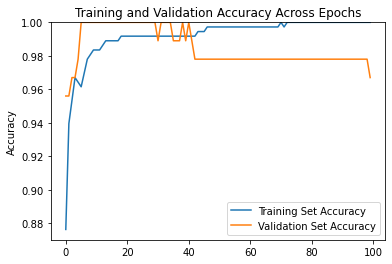

In [35]:
#plot the training and validation accuracy
accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

plt.plot(accuracy, label='Training Set Accuracy')
plt.plot(validation_accuracy, label='Validation Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

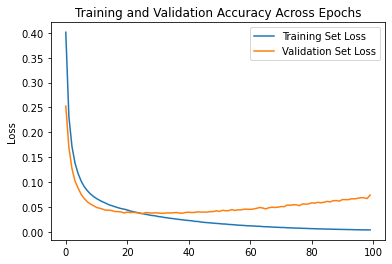

In [36]:
#ploting the training and validation loss 
loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(loss, label='Training Set Loss')
plt.plot(validation_loss, label='Validation Set Loss')
plt.ylabel('Loss')
plt.title('Training and Validation Accuracy Across Epochs')
plt.legend()

In [37]:

# Predicting the Test set results
y_pred = (classifier.predict(X_test)>0.5).astype('int32')
y_pred = y_pred[:,0]
y_pred

4/4 [==============================] - 0s 566us/step


array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0])

Neural Network accuracy:  0.956140350877193


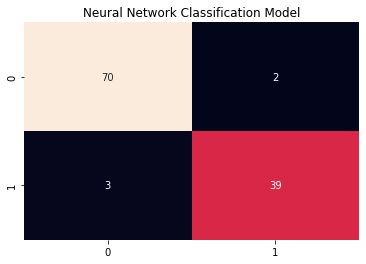

In [46]:
#Evaluation of the model
cm = confusion_matrix(y_test, y_pred.round())
plt.title("Neural Network Classification Model")
sns.heatmap(cm,annot=True,fmt="d",cbar=False)

#accuracy score
ac=accuracy_score(y_test, y_pred.round())
print('Neural Network accuracy: ',ac)

In [39]:
#Using classification_report to view some key evaluation metrics for the Neural Network model.
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97        72
           1       0.95      0.93      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



XGBOOST CLASSIFIER

XGBoost_accuracy: 0.9473684210526315


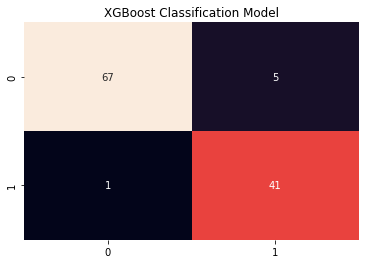

In [47]:
XGB=XGBClassifier()
XGB.fit(X_train,y_train)
XGB_pred=XGB.predict(X_test)

#Evaluation of the model
XGB_cm=confusion_matrix(y_test,XGB_pred)
XGB_ac=accuracy_score(XGB_pred,y_test)
plt.title("XGBoost Classification Model")
sns.heatmap(XGB_cm,annot=True,fmt="d",cbar=False)
print('XGBoost_accuracy:',XGB_ac)

In [41]:
#Using classification_report to view some key evaluation metrics for the XGBoost model.
print(classification_report(y_test,XGB_pred))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96        72
           1       0.89      0.98      0.93        42

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



KNN

KNeighbors_accuracy: 0.9385964912280702


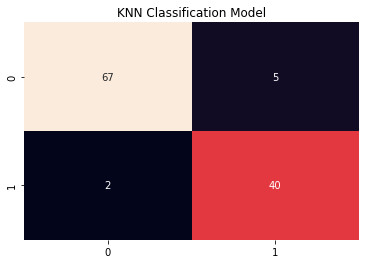

In [48]:
KNN_c=KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
KNN_c.fit(X_train,y_train)
KNN_pred=KNN_c.predict(X_test)

#Evaluation of the model
KNN_cm=confusion_matrix(y_test,KNN_pred)
KNN_ac=accuracy_score(KNN_pred,y_test)
plt.title("KNN Classification Model")
sns.heatmap(KNN_cm,annot=True,fmt="d",cbar=False)
print('KNeighbors_accuracy:',KNN_ac)

In [43]:
#Using classification_report to view some key evaluation metrics for the KNN model.
print(classification_report(y_test,KNN_pred))

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        72
           1       0.89      0.95      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [ ]:
#Neural Networks had the best performance